In [1]:
pip install pydub

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import scipy as sp
from matplotlib import pyplot as plt
from PIL import Image, ImageEnhance
from pydub import AudioSegment

/home/water/.local/lib/python3.10/site-packages/pydub/utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


In [3]:
fs = 48000
length = 102191
s = np.random.random(size = length) * 2 - 1
sp.io.wavfile.write('./data/whitenoise.wav', fs, s) #音量注意

In [4]:
f1, speech1 = sp.io.wavfile.read('./result/speech1.wav')
f2, noise = sp.io.wavfile.read('./data/whitenoise.wav')
print(np.size(speech1))
print(np.size(noise))
print(f1)
print(f2)
print(noise)

102191
102191
8000
48000
[ 0.00953998 -0.88073452  0.19882792 ...  0.53413478  0.06032148
  0.14051813]


In [5]:
mix_1 = speech1 * 0.8 + noise * 0.2
mix_2 = speech1 * 0.3 + noise * 0.7

In [6]:
sp.io.wavfile.write('./data/mix_1.wav', fs, mix_1) 
sp.io.wavfile.write('./data/mix_2.wav', fs, mix_2) 

In [7]:
z = np.array([mix_1, mix_2])
sigma = np.linalg.eig(np.cov(z))
D = sigma[0]
D = 1/np.sqrt(D)
E = sigma[1]
tmp = np.dot(E, np.diag(D))
V = np.dot(tmp, E.T)
z = np.dot(V,z)
size = len(speech1)

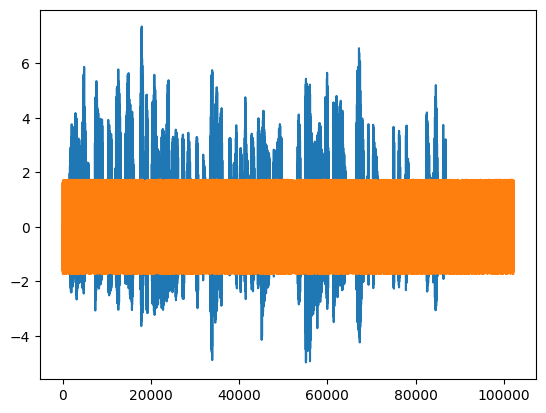

In [8]:
w = np.array([1,1])
wT = w.T
wT = wT/np.linalg.norm(wT)
former = w
while(1):
  wT = w.T
  tmp = np.power(np.dot(wT, z), 3)
  tmp = np.dot(z, tmp)
  tmp = tmp/size - 3*w
  tmp /= np.linalg.norm(tmp)
  w = tmp
  if(np.isclose(w,former).all() or np.isclose(w,former*(-1)).all()):
    break
  else:
    former = w
plt.plot(np.dot(w,z))
sp.io.wavfile.write('./result/speechkadai4.wav', f1, np.dot(w,z))

w = np.array([0.5,0.5])
wT = w.T
wT = wT/np.linalg.norm(wT)
former = w
while(1):
  wT = w.T
  tmp = np.power(np.dot(wT, z), 3)
  tmp = np.dot(z, tmp)
  tmp = tmp/size - 3*w
  tmp /= np.linalg.norm(tmp)
  w = tmp
  if(np.isclose(w,former).all() or np.isclose(w,former*(-1)).all()):
    break
  else:
    former = w
plt.plot(np.dot(w,z))
sp.io.wavfile.write('./result/noise.wav', f2, np.dot(w,z))